## 5.1 机器学习简介

### 机器学习本质：
    借助数学模型理解数据。当我们给模型装上可以适应观测数据的可调参数时，‘学习’便开始了，此时的程序被认为<br>
    具有从数据中‘学习’的能力。一旦模型可以拟合旧的观测数据，那么它们就可以预测并解释新的观测数据。

### 机器学习的分类
#### 1.有监督学习
    指对数据的若干特征与若干标签(类型)之间的关联性进行建模的过程，只要模型被确定，就可以应用到新的位置数据上.
    可以进一步分为分类任务和回归任务。在分类任务中，标签都是离散的，而在回归任务中，标签都是连续的。
#### 2.无监督学习
    指对不带任何标签的数据特征进行建模。通常被看成是一种‘让数据自己介绍自己’的过程。这类模型包括聚类任务和降维任务。
    聚类算法可以将数据分成不同的组别，而降维算法追求用更简洁的方式表现数据。
#### 3.半监督学习
    在此学习方式下，输入数据部分被标识，部分没有被标识，这种学习模型可以用来进行预测，
    但是模型首先需要学习数据的内在结构以便合理的组织数据来进行预测
#### 4.强化学习
    在这种学习模式下，输入数据作为对模型的反馈，不像监督模型那样，输入数据仅仅是作为一个检查模型对错的方式，
    在强化学习下，输入数据直接反馈到模型，模型必须对此立刻作出调整。

    

---
### 分类 ：预测离散标签

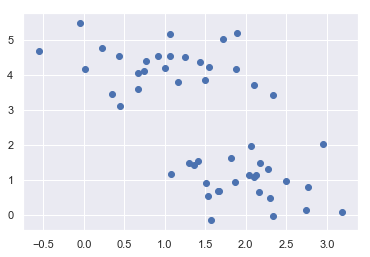

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
#生成数据集
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
#可视化数据散点图
plt.scatter(X[:,0],X[:,1])

In [39]:
#用支持向量机分类
clf = SVC(kernel='linear')
clf.fit(X,y)
#生成新的数据
X2,_ = make_blobs(n_samples=80,centers=2,random_state=0,cluster_std=0.80)
#X2 = X2[50:]
#得到预测结果
y2 = clf.predict(X2)

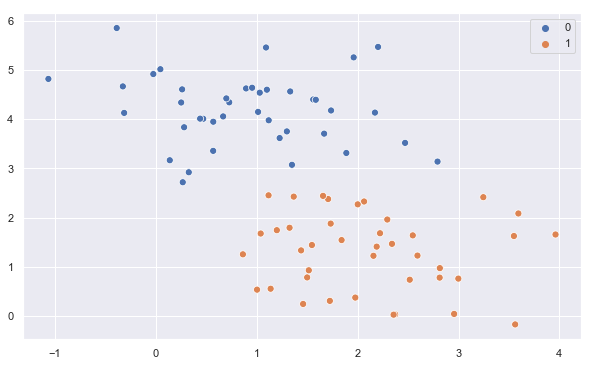

In [40]:
#可视化分类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(X2[:, 0], X2[:, 1], hue=y2,s=50,cmap='Paired')

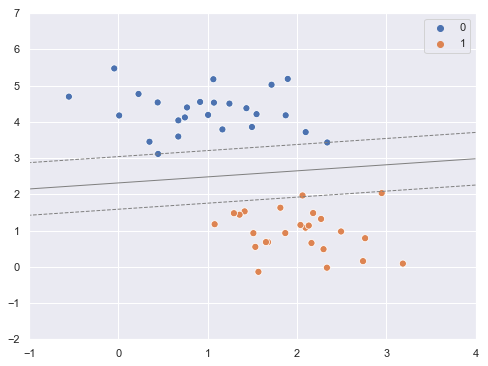

In [52]:
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
point_style = dict(cmap='Paired', s=50)
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

---
### 回归 ：预测连续标签

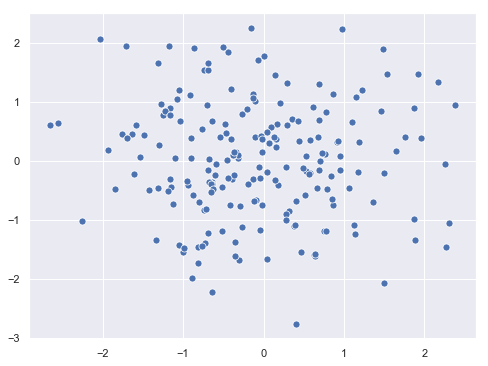

In [65]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(0)
#构造数据
X = rng.randn(200,2)
y = np.dot(X,(-2,1))+0.1*rng.randn(X.shape[0])

#可视化数据
plt.figure(figsize=(8,6))
sns.scatterplot(X[:,0],X[:,1],**point_style)

In [80]:
model = LinearRegression()
model.fit(X,y)
print('回归系数：',model.coef_)
print('截距：',model.intercept_)

回归系数： [-1.99546497  1.00688487]
截距： -0.010550837041609418


---
#### 聚类 ：为无标签数据添加标签

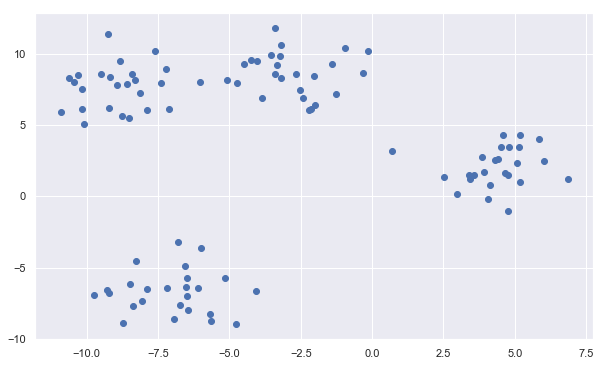

In [95]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(n_samples=100,centers=4,random_state=42,cluster_std=1.5)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1])

In [87]:
model = KMeans(4,random_state=0)
model.fit(X)
labels = model.predict(X)

In [88]:
labels

array([3, 1, 0, 1, 3, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 3, 3, 2, 3, 3, 0, 3,
       3, 2, 2, 0, 2, 3, 3, 1, 1, 2, 1, 3, 0, 0, 0, 0, 2, 2, 3, 2, 1, 0,
       0, 1, 1, 3, 3, 2, 2, 2, 2, 1, 3, 3, 0, 0, 2, 0, 1, 2, 3, 1, 3, 3,
       1, 3, 2, 1, 2, 1, 3, 0, 1, 3, 1, 3, 1, 1, 2, 1, 0, 3, 0, 0, 0, 1,
       0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 3, 2])

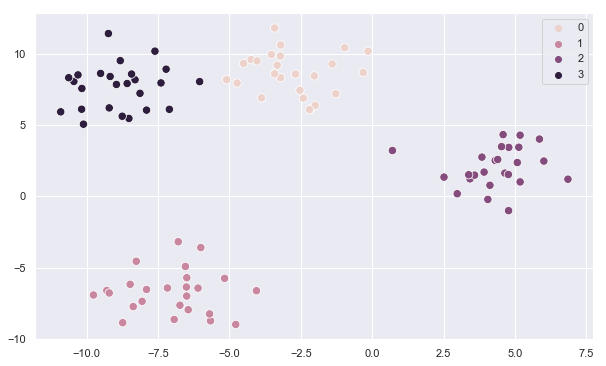

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(X[:,0],X[:,1],hue=labels,s=70)

---
#### 降维：推断无标签数据的结构

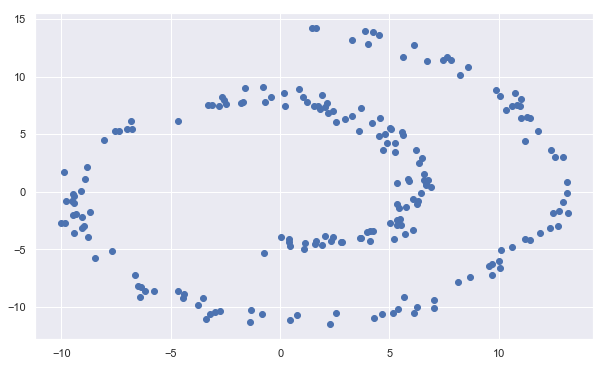

In [96]:
from sklearn.datasets import make_swiss_roll
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1])

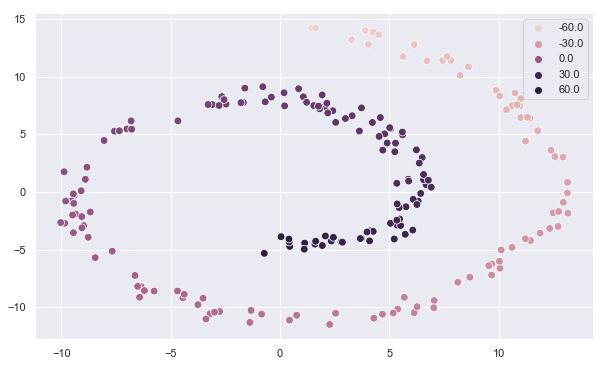

In [104]:
from sklearn.manifold import Isomap
model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()
plt.figure(figsize=(10,6))
sns.scatterplot(X[:,0],X[:,1],hue=y_fit,s=60)